In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords

In [ ]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.2 MB/s eta 0:00:00


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True



```
# Ini diformat sebagai kode
```

##**CLONING DATASET**##

In [ ]:
! apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
!rm -r TA/
!git clone https://github.com/keenan09/TA.git

rm: cannot remove 'TA/': No such file or directory
Cloning into 'TA'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (16/16), 1.78 MiB | 5.39 MiB/s, done.
Resolving deltas: 100% (3/3), done.


##**READ DATASET**##

In [ ]:
url = '/content/TA/dataset_final.csv'
dataset = pd.read_csv(url)

dataset

,review,label
0,Woi ngnt lu kalo iklan jangan maksa napa kontool,0
1,"Ini aplikasi yang bagus, cuma karena sering ba...",0
2,"Suka belanja di lazada,tapi akhir akhir ini, g...",0
3,Banyak barang ga sesuai chuak.,0
4,"Aplikasi ga jelas, dikasi limit 200rbu tapi ga...",0
...,...,...
9741,makasih,1
9742,Ga dapet fitur lazada paylater,0
9743,Pembelian yang jujur dan amanah,1
9744,SELALU BERIKAN YANG TERBAIK DALAM MELAYANI KEB...,1


In [ ]:
# encoding_list = ['ascii', 'big5', 'big5hkscs', 'cp037', 'cp273', 'cp424', 'cp437', 'cp500', 'cp720', 'cp737'
#                  , 'cp775', 'cp850', 'cp852', 'cp855', 'cp856', 'cp857', 'cp858', 'cp860', 'cp861', 'cp862'
#                  , 'cp863', 'cp864', 'cp865', 'cp866', 'cp869', 'cp874', 'cp875', 'cp932', 'cp949', 'cp950'
#                  , 'cp1006', 'cp1026', 'cp1125', 'cp1140', 'cp1250', 'cp1251', 'cp1252', 'cp1253', 'cp1254'
#                  , 'cp1255', 'cp1256', 'cp1257', 'cp1258', 'euc_jp', 'euc_jis_2004', 'euc_jisx0213', 'euc_kr'
#                  , 'gb2312', 'gbk', 'gb18030', 'hz', 'iso2022_jp', 'iso2022_jp_1', 'iso2022_jp_2'
#                  , 'iso2022_jp_2004', 'iso2022_jp_3', 'iso2022_jp_ext', 'iso2022_kr', 'latin_1', 'iso8859_2'
#                  , 'iso8859_3', 'iso8859_4', 'iso8859_5', 'iso8859_6', 'iso8859_7', 'iso8859_8', 'iso8859_9'
#                  , 'iso8859_10', 'iso8859_11', 'iso8859_13', 'iso8859_14', 'iso8859_15', 'iso8859_16', 'johab'
#                  , 'koi8_r', 'koi8_t', 'koi8_u', 'kz1048', 'mac_cyrillic', 'mac_greek', 'mac_iceland', 'mac_latin2'
#                  , 'mac_roman', 'mac_turkish', 'ptcp154', 'shift_jis', 'shift_jis_2004', 'shift_jisx0213', 'utf_32'
#                  , 'utf_32_be', 'utf_32_le', 'utf_16', 'utf_16_be', 'utf_16_le', 'utf_7', 'utf_8', 'utf_8_sig']

# for encoding in encoding_list:
#     worked = True
#     try:

#     except:
#         worked = False
#     if worked:
#         print(encoding, ':\n', df.head())
# dataset = pd.read_csv("/content/datazet.csv")

# dataset

In [ ]:
dataset.shape

(9746, 2)

##**DATA VISUALISASI**##

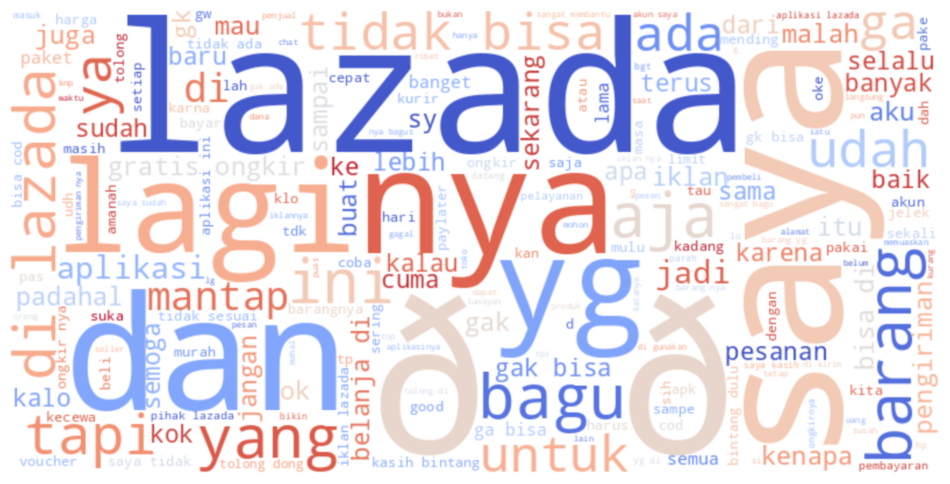

In [ ]:
# Gabung semua review
text = ' '.join(dataset['review'])

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm', random_state=42).generate(text)

# Plot WordCloud
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.show()

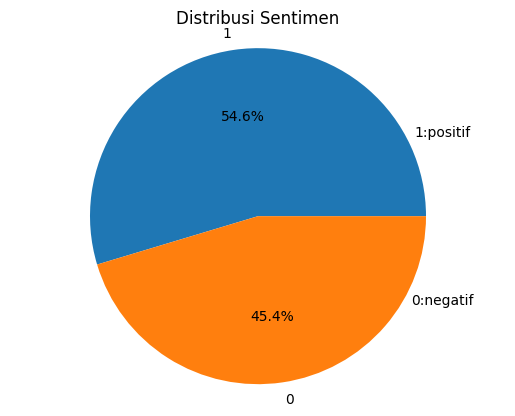

In [ ]:
# hitung jumlah positif and negatif comments
sentiment_counts = dataset['label'].value_counts()

# Visualisasi ke Jumlah comments positif dan negatif ke dalam pie chart
labels = sentiment_counts.index.tolist()
plt.pie(sentiment_counts.values, labels=labels, autopct='%1.1f%%')
plt.text(1.1, -0.5, '0:negatif', ha='center', va='center')
plt.text(1.1, 0.5, '1:positif', ha='center', va='center')
plt.title('Distribusi Sentimen')
plt.axis('equal')
plt.show()

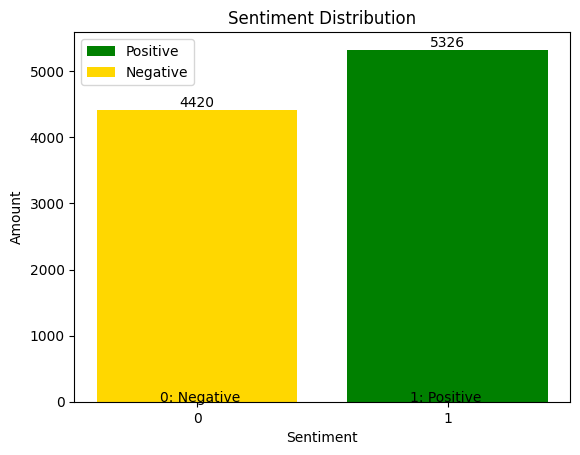

In [ ]:
# Visualisasi ke Jumlah comments positif dan negatif ke dalam bar chart
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'gold'])

# Adding text annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.xticks(range(len(labels)), labels.reverse()) #label x axis
plt.text(-0.15, -5, '0: Negative') #keterangan
plt.text(0.85, -5, '1: Positive') #keterangan
plt.xlabel('Sentiment')
plt.ylabel('Amount')
plt.title('Sentiment Distribution')
plt.legend(bars, ['Positive', 'Negative'])
plt.show()

##**PRE-PROCESSING**##

In [ ]:
import string

def clean_text(text):
    # Remove mentions
    text = re.sub(r'\.+', ' ', text)
    text = re.sub(r'\,+', ' ', text)
    text = text.replace("/", " ")
    text = text.strip()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    #lowercase
    text = text.lower()
    # text = re.sub(':-\)', '', text)
    # text = re.sub(':\)', '', text)

    return text

dataset['clean_text'] = dataset['review'].apply(clean_text)
dataset['review']=dataset['clean_text']
dataset = dataset[['review','label']]
dataset

,review,label
0,woi ngnt lu kalo iklan jangan maksa napa kontool,0
1,ini aplikasi yang bagus cuma karena sering ba...,0
2,suka belanja di lazada tapi akhir akhir ini g...,0
3,banyak barang ga sesuai chuak,0
4,aplikasi ga jelas dikasi limit rbu tapi ga bi...,0
...,...,...
9741,makasih,1
9742,ga dapet fitur lazada paylater,0
9743,pembelian yang jujur dan amanah,1
9744,selalu berikan yang terbaik dalam melayani keb...,1


In [ ]:
def remove_repeated_vowels(dataframe, column_name):
    # Define the function to remove repeated vowels (a, i, u, e, o) within words
    def remove_repeated_vowels(word):
        if len(word) < 2:
            return word  # If the word has length less than 2, no need to process it
        cleaned_word = word[0]
        for i in range(1, len(word)):
            if word[i] not in "aiueo" or word[i] != word[i - 1]:
                cleaned_word += word[i]
        return cleaned_word

    # Apply the remove_repeated_vowels function to the specified column
    dataframe[column_name] = dataframe[column_name].apply(remove_repeated_vowels)

    return dataframe

cleaned_df = remove_repeated_vowels(dataset, 'review')
cleaned_df

<ipython-input-19-dd7fbc57e6df>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column_name] = dataframe[column_name].apply(remove_repeated_vowels)


,review,label
0,woi ngnt lu kalo iklan jangan maksa napa kontol,0
1,ini aplikasi yang bagus cuma karena sering ba...,0
2,suka belanja di lazada tapi akhir akhir ini g...,0
3,banyak barang ga sesuai chuak,0
4,aplikasi ga jelas dikasi limit rbu tapi ga bi...,0
...,...,...
9741,makasih,1
9742,ga dapet fitur lazada paylater,0
9743,pembelian yang jujur dan amanah,1
9744,selalu berikan yang terbaik dalam melayani keb...,1


In [ ]:
# def case_folding(text) :
#   text = text.lower()
#   text = text.strip(" ")
#   return text

# dataset['review'] = dataset['review'].apply(case_folding)
# dataset.head()

In [ ]:
from nltk.tokenize import word_tokenize
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return ' '.join(filtered_tokens)


In [ ]:
url = '/content/TA/stopwords-id.txt'
added_stopwords = pd.read_csv(url, names=["stopwords"], header=None)

added_stopwords

# get stopword indonesia
list_stopwords = stopwords.words('indonesian')

stop_words = stopwords.words('indonesian')
# add manual stopword
stop_words.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 'lu', 'napa', 'chuak', 'ok','woi',
                       'anjir', 'njir', 'bjir','njr','kalo', 'konl','amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'ngk', 'krn', 'nya', 'nih', 'sih', 'lg', 'cod', 'rbu', 'ribu',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 'kontol', 'konl', 'kek', 'ngentot',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 'kontool', 'ngnt',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'gtgt','ltlt', 'tik', 'tok', 'kayk', 'bat', 'kkak'])

# Add stopwords dari txt file
txt_stopword = added_stopwords

txt_stopword

stop_words.extend(txt_stopword["stopwords"][0].split(' '))

stop_words = set(stop_words)

cleaned_df['remove_stopwords'] = cleaned_df['review'].apply(remove_stopwords)
cleaned_df['review'] = cleaned_df['remove_stopwords']
cleaned_df = cleaned_df[['review', 'label']]
cleaned_df

,review,label
0,iklan maksa,0
1,aplikasi bagus spam iklan sorry gue kasih bint...,0
2,suka belanja lazada gratis ongkir berfungsi di...,0
3,barang sesuai,0
4,aplikasi dikasi limit dipakai limitnya lo kasi...,0
...,...,...
9741,makasih,1
9742,dapet fitur lazada paylater,0
9743,pembelian jujur amanah,1
9744,terbaik melayani kebutuhan pelanggan semangat ...,1


In [ ]:
# cleaned_df.isnull()
def remove_null_and_reset_index(dataset, column_name):
    null_rows = dataset[dataset[column_name].str.len() == 0]

    # Drop rows with null or empty strings
    dataset = dataset.drop(index=null_rows.index)

    # Reset the index
    dataset = dataset.reset_index(drop=True)

    return dataset

new_dataset = remove_null_and_reset_index(cleaned_df, 'review')
new_dataset

,review,label
0,iklan maksa,0
1,aplikasi bagus spam iklan sorry gue kasih bint...,0
2,suka belanja lazada gratis ongkir berfungsi di...,0
3,barang sesuai,0
4,aplikasi dikasi limit dipakai limitnya lo kasi...,0
...,...,...
9073,makasih,1
9074,dapet fitur lazada paylater,0
9075,pembelian jujur amanah,1
9076,terbaik melayani kebutuhan pelanggan semangat ...,1


In [ ]:
def stem_text(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)


def apply_stemming(dataframe, column_name):
    dataframe[column_name] = dataframe[column_name].apply(stem_text)
    return dataframe

stemmed_df = apply_stemming(new_dataset, 'review')
stemmed_df

,review,label
0,iklan maksa,0
1,aplikasi bagus spam iklan sorry gue kasih bint...,0
2,suka belanja lazada gratis ongkir fungsi tulis...,0
3,barang sesuai,0
4,aplikasi kasi limit pakai limit lo kasi limit ...,0
...,...,...
9073,makasih,1
9074,dapet fitur lazada paylater,0
9075,beli jujur amanah,1
9076,baik layan butuh langgan semangat its the best,1


In [ ]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply the tokenization function to the "review" column
stemmed_df['tokens'] = stemmed_df['review'].apply(tokenize_text)
stemmed_df

,review,label,tokens
0,iklan maksa,0,"[iklan, maksa]"
1,aplikasi bagus spam iklan sorry gue kasih bint...,0,"[aplikasi, bagus, spam, iklan, sorry, gue, kas..."
2,suka belanja lazada gratis ongkir fungsi tulis...,0,"[suka, belanja, lazada, gratis, ongkir, fungsi..."
3,barang sesuai,0,"[barang, sesuai]"
4,aplikasi kasi limit pakai limit lo kasi limit ...,0,"[aplikasi, kasi, limit, pakai, limit, lo, kasi..."
...,...,...,...
9073,makasih,1,[makasih]
9074,dapet fitur lazada paylater,0,"[dapet, fitur, lazada, paylater]"
9075,beli jujur amanah,1,"[beli, jujur, amanah]"
9076,baik layan butuh langgan semangat its the best,1,"[baik, layan, butuh, langgan, semangat, its, t..."


In [ ]:
stemmed_df.to_csv('dataset_after_preprocessing.csv', index=False)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TEST SCORE
# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform(stemmed_df["review"])

# #Get the feature names (words) from the vectorizer
# feature_names = tfidf_vectorizer.get_feature_names_out()

# #Create a dictionary to store TF-IDF values for each document
# tfidf_values = {}
# for i, document in enumerate(stemmed_df["review"]):
#     tfidf_values[f'Document {i+1}'] = dict(zip(feature_names, tfidf_matrix_dense[i]))

# #values
# for doc, values in tfidf_values.items():
#     print(doc)
#     for term, score in values.items():
#         print(f"{term}: {score}")
#     print("\n")

tf_idf = TfidfVectorizer()
text_tfidf = tf_idf.fit_transform(stemmed_df['tokens'].astype('U'))
text_tfidf

<9078x5706 sparse matrix of type '<class 'numpy.float64'>'
	with 53358 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_tfidf, stemmed_df['label'], test_size=0.2, random_state = 42)

# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

mnb = MultinomialNB().fit(X_train, y_train)
predict_mnb = mnb.predict(X_test)

print("Multinomial Naive Bayes Accuracy : ", accuracy_score(y_test, predict_mnb))
print("Multinomial Naive Bayes Precision : ", precision_score(y_test, predict_mnb, average='binary'))
print("Multinomial Naive Bayes Recall : ", recall_score(y_test, predict_mnb, average='binary'))
print("Multinomial Naive Bayes F1-Score : ", f1_score(y_test, predict_mnb, average='binary'))

print(f'confusion matrix:\n{confusion_matrix(y_test, predict_mnb)}')
print("------------------------")
print(classification_report(y_test, predict_mnb, zero_division=0))

Multinomial Naive Bayes Accuracy :  0.9124449339207048
Multinomial Naive Bayes Precision :  0.9275675675675675
Multinomial Naive Bayes Recall :  0.9031578947368422
Multinomial Naive Bayes F1-Score :  0.9152
confusion matrix:
[[799  67]
 [ 92 858]]
------------------------
              precision    recall  f1-score   support

          -1       0.90      0.92      0.91       866
           1       0.93      0.90      0.92       950

    accuracy                           0.91      1816
   macro avg       0.91      0.91      0.91      1816
weighted avg       0.91      0.91      0.91      1816



In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

predict_svm = svm.predict(X_test)

print("Support Vector Machine Accuracy : ", accuracy_score(y_test, predict_svm))
print("Support Vector Machine Precision : ", precision_score(y_test, predict_svm, average='binary'))
print("Support Vector Machine Recall : ", recall_score(y_test, predict_svm, average='binary'))
print("Support Vector Machine F1-Score : ", f1_score(y_test, predict_svm, average='binary'))

print(f'confusion matrix:\n{confusion_matrix(y_test, predict_svm)}')
print("------------------------")
print(classification_report(y_test, predict_svm, zero_division=0))

Support Vector Machine Accuracy :  0.9140969162995595
Support Vector Machine Precision :  0.9324618736383442
Support Vector Machine Recall :  0.9010526315789473
Support Vector Machine F1-Score :  0.9164882226980726
confusion matrix:
[[804  62]
 [ 94 856]]
------------------------
              precision    recall  f1-score   support

          -1       0.90      0.93      0.91       866
           1       0.93      0.90      0.92       950

    accuracy                           0.91      1816
   macro avg       0.91      0.91      0.91      1816
weighted avg       0.91      0.91      0.91      1816



In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB().fit(X_train, y_train)
bnb_predict = bnb.predict(X_test)

print("Bernoulli Naive Bayes Accuracy : ", accuracy_score(y_test, bnb_predict))
print("Bernoulli Naive Bayes Precision : ", precision_score(y_test, bnb_predict, average='binary'))
print("Bernoulli Naive Bayes Recall : ", recall_score(y_test, bnb_predict, average='binary'))
print("Bernoulli Naive Bayes F1-Score : ", f1_score(y_test, bnb_predict, average='binary'))

print(f'confusion matrix:\n{confusion_matrix(y_test, bnb_predict)}')
print("------------------------")
print(classification_report(y_test, bnb_predict, zero_division=0))

Bernoulli Naive Bayes Accuracy :  0.8270925110132159
Bernoulli Naive Bayes Precision :  0.7741379310344828
Bernoulli Naive Bayes Recall :  0.9452631578947368
Bernoulli Naive Bayes F1-Score :  0.8511848341232229
confusion matrix:
[[604 262]
 [ 52 898]]
------------------------
              precision    recall  f1-score   support

          -1       0.92      0.70      0.79       866
           1       0.77      0.95      0.85       950

    accuracy                           0.83      1816
   macro avg       0.85      0.82      0.82      1816
weighted avg       0.84      0.83      0.82      1816



In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble_clf = VotingClassifier(estimators=[
    ('multinomial_naive_bayes', mnb),
    ('support_vector_machine', svm),
    ('bernoulli_naive_bayes', bnb)
], voting='hard')

ensemble_clf.fit(X_train, y_train)
hard_voting_predict = ensemble_clf.predict(X_test)


print("Hard Voting Majority Accuracy : ", accuracy_score(y_test, hard_voting_predict))
print("Hard Voting Majority Precision : ", precision_score(y_test, hard_voting_predict, average='binary'))
print("Hard Voting Majority Recall : ", recall_score(y_test, hard_voting_predict, average='binary'))
print("Hard Voting Majority F1-Score : ", f1_score(y_test, hard_voting_predict, average='binary'))

print(f'confusion matrix:\n{confusion_matrix(y_test, hard_voting_predict)}')
print("------------------------")
print(classification_report(y_test, hard_voting_predict, zero_division=0))

Hard Voting Majority Accuracy :  0.9162995594713657
Hard Voting Majority Precision :  0.9253731343283582
Hard Voting Majority Recall :  0.9136842105263158
Hard Voting Majority F1-Score :  0.9194915254237288
confusion matrix:
[[796  70]
 [ 82 868]]
------------------------
              precision    recall  f1-score   support

          -1       0.91      0.92      0.91       866
           1       0.93      0.91      0.92       950

    accuracy                           0.92      1816
   macro avg       0.92      0.92      0.92      1816
weighted avg       0.92      0.92      0.92      1816



In [ ]:
ensemble_clf = VotingClassifier(estimators=[
    ('multinomial_naive_bayes', mnb),
    ('support_vector_machine', svm),
    ('bernoulli_naive_bayes', bnb)
], voting='soft')

ensemble_clf.fit(X_train, y_train)
soft_voting_predict = ensemble_clf.predict(X_test)


print("Soft Voting Majority Accuracy : ", accuracy_score(y_test, soft_voting_predict))
print("Soft Voting Majority Precision : ", precision_score(y_test, soft_voting_predict, average='binary'))
print("Soft Voting Majority Recall : ", recall_score(y_test, soft_voting_predict, average='binary'))
print("Soft Voting Majority F1-Score : ", f1_score(y_test, soft_voting_predict, average='binary'))

print(f'confusion matrix:\n{confusion_matrix(y_test, soft_voting_predict)}')
print("------------------------")
print(classification_report(y_test, soft_voting_predict, zero_division=0))

Voting Majority Accuracy :  0.9030837004405287
Voting Majority Precision :  0.8846918489065606
Voting Majority Recall :  0.9368421052631579
Voting Majority F1-Score :  0.9100204498977505
confusion matrix:
[[750 116]
 [ 60 890]]
------------------------
              precision    recall  f1-score   support

          -1       0.93      0.87      0.89       866
           1       0.88      0.94      0.91       950

    accuracy                           0.90      1816
   macro avg       0.91      0.90      0.90      1816
weighted avg       0.90      0.90      0.90      1816

